# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to /Users/HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/HP/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/HP/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
tf.config.set_visible_devices([], 'GPU')

In [3]:
df1 = pd.read_csv('/Users/HP/Documents/STUDIES/PYTHONCODES/DATASETS/NewsCategorizer.csv') 

In [4]:
df1

category                                           headline  \
0      WELLNESS              143 Miles in 35 Days: Lessons Learned   
1      WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2      WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3      WELLNESS                     Oh, What a Difference She Made   
4      WELLNESS                                   Green Superfoods   
...         ...                                                ...   
49995    SPORTS  This Baseball Team Learned There's A Wrong Way...   
49996    SPORTS  Some Young Spurs Fan Dabbed 38 Times In A Sing...   
49997    SPORTS  Rasheed Wallace Ejected From Knicks-Suns Game ...   
49998    SPORTS  Why Jake Plummer And Other NFL Players Are Pus...   
49999    SPORTS  Simone Biles Isn't The Next Anyone, She's 'The...   

                                                   links  \
0      https://www.huffingtonpost.com/entry/running-l...   
1      https://www.huffingtonpost.com/entry/talking-t...   
2      https://www.huffingtonpost.com/entry/crenezuma...   
3      https://www.huffingtonpost.com/entry/meaningfu...   
4      https://www.huffingtonpost.com/entry/green-sup...   
...                                                  ...   
49995  https://www.huffingtonpost.com/entry/san-jose-...   
49996  https://www.huffingtonpost.com/entry/dab-kid-s...   
49997  https://www.huffingtonpost.com/entry/rasheed-w...   
49998  https://www.huffingtonpost.comhttp://extras.de...   
49999  https://www.huffingtonpost.com/entry/the-first...   

                                       short_description  \
0      Resting is part of training. I've confirmed wh...   
1      Think of talking to yourself as a tool to coac...   
2      The clock is ticking for the United States to ...   
3      If you want to be busy, keep trying to be perf...   
4      First, the bad news: Soda bread, corned beef a...   
...                                                  ...   
49995  Many fans were pissed after seeing the minor l...   
49996             Never change, young man. Never change.   
49997  Wallace was hit with a first technical for a h...   
49998  They believe CBD could be an alternative to po...   
49999             The gymnast is in a league of her own.   

                                                keywords  
0                                        running-lessons  
1                              talking-to-yourself-crazy  
2                     crenezumab-alzheimers-disease-drug  
3                                        meaningful-life  
4                                       green-superfoods  
...                                                  ...  
49995            san-jose-giants-japanese-heritage-night  
49996                          dab-kid-san-antonio-spurs  
49997  rasheed-wallace-ejected-knicks-suns-ball-dont-lie  
49998                                                NaN  
49999                             the-first-simone-biles  

[50000 rows x 5 columns]

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [6]:
# Dropping unecessary columns
df1 = df1.drop(columns=['headline', 'links', 'keywords'])

In [7]:
# copy short_description column data to description column for unison with other dataset later on
df1['description'] = df1['short_description']

In [8]:
# Drop short_description column
df1 = df1.drop(columns=['short_description'])

In [9]:
df1

category                                        description
0      WELLNESS  Resting is part of training. I've confirmed wh...
1      WELLNESS  Think of talking to yourself as a tool to coac...
2      WELLNESS  The clock is ticking for the United States to ...
3      WELLNESS  If you want to be busy, keep trying to be perf...
4      WELLNESS  First, the bad news: Soda bread, corned beef a...
...         ...                                                ...
49995    SPORTS  Many fans were pissed after seeing the minor l...
49996    SPORTS             Never change, young man. Never change.
49997    SPORTS  Wallace was hit with a first technical for a h...
49998    SPORTS  They believe CBD could be an alternative to po...
49999    SPORTS             The gymnast is in a league of her own.

[50000 rows x 2 columns]

In [10]:
#Import another dataset
df = pd.read_csv('/Users/HP/Documents/STUDIES/PYTHONCODES/DATASETS/news_category1.csv')

In [11]:
# Combine both dataset together
final_df = pd.concat([df, df1])

In [12]:
final_df

description    category
0      DeepMind's AI system 'AlphaFold' has been reco...  TECHNOLOGY
1      Microsoft Teams will stop working on Internet ...  TECHNOLOGY
2      China, in response to reports of US adding Chi...  TECHNOLOGY
3      The global smartphone sales in the third quart...  TECHNOLOGY
4      The European Union (EU) is hoping that US Pres...  TECHNOLOGY
...                                                  ...         ...
49995  Many fans were pissed after seeing the minor l...      SPORTS
49996             Never change, young man. Never change.      SPORTS
49997  Wallace was hit with a first technical for a h...      SPORTS
49998  They believe CBD could be an alternative to po...      SPORTS
49999             The gymnast is in a league of her own.      SPORTS

[62120 rows x 2 columns]

In [13]:
final_df.description[2]

2    China, in response to reports of US adding Chi...
2    The clock is ticking for the United States to ...
Name: description, dtype: object

In [14]:
# Dropping data duplication
final_df.drop_duplicates()

description    category
0      DeepMind's AI system 'AlphaFold' has been reco...  TECHNOLOGY
1      Microsoft Teams will stop working on Internet ...  TECHNOLOGY
2      China, in response to reports of US adding Chi...  TECHNOLOGY
3      The global smartphone sales in the third quart...  TECHNOLOGY
4      The European Union (EU) is hoping that US Pres...  TECHNOLOGY
...                                                  ...         ...
49988  Monday’s events beg the question -- would a bl...      SPORTS
49991                        Plenty of air, plenty to do      SPORTS
49995  Many fans were pissed after seeing the minor l...      SPORTS
49996             Never change, young man. Never change.      SPORTS
49999             The gymnast is in a league of her own.      SPORTS

[51165 rows x 2 columns]

In [15]:
final_df['category'].value_counts()

category
ENTERTAINMENT     7036
SPORTS            6900
POLITICS          6596
WELLNESS          5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
WORLD             2067
TECHNOLOGY        1791
SCIENCE           1437
AUTOMOBILE        1293
Name: count, dtype: int64

This process needs to be done because the rows with index 1 are both technology and wellness so we need to reset
the index so that each rows has their own index numbers so index number 1 should just be technology and so forth

In [16]:
# Access rows based on the original integer-based index
print(final_df.loc[1]['category'])  # Accessing the first row with index 1

# Reset the index of your DataFrame
final_df.reset_index(drop=True, inplace=True)


1    TECHNOLOGY
1      WELLNESS
Name: category, dtype: object


In [17]:
# Replace 'WORLD NEWS' with 'WORLD' in the 'category' column since both are actually the same
final_df['category'] = final_df['category'].replace('WORLD NEWS', 'WORLD')

# Verify the updated category counts
category_counts = final_df['category'].value_counts()
print(category_counts)

category
WORLD             7067
ENTERTAINMENT     7036
SPORTS            6900
POLITICS          6596
WELLNESS          5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
BUSINESS          5000
TECHNOLOGY        1791
SCIENCE           1437
AUTOMOBILE        1293
Name: count, dtype: int64


In [18]:
target_rows_per_category = 1000

selected_data = pd.DataFrame(columns=['category'])


In [19]:
#Iterate over each category and select the desired number of rows
for category, count in final_df['category'].value_counts().items():
    if count >= target_rows_per_category:
        # Select the first 2000 rows for the category
        category_data = final_df[final_df['category'] == category].head(target_rows_per_category)
        selected_data = pd.concat([selected_data, category_data])

In [20]:
selected_data['category'].value_counts()

category
WORLD             1000
ENTERTAINMENT     1000
SPORTS            1000
POLITICS          1000
WELLNESS          1000
TRAVEL            1000
STYLE & BEAUTY    1000
PARENTING         1000
FOOD & DRINK      1000
BUSINESS          1000
TECHNOLOGY        1000
SCIENCE           1000
AUTOMOBILE        1000
Name: count, dtype: int64

In [21]:
selected_data.reset_index(drop=True, inplace=True)

In [22]:
selected_data['description']

0        A 101-year-old Italian woman who lived through...
1        China on February 10 officially reported 2,478...
2        A US analyst has said North Korean leader Kim ...
3        Commenting on farmers' protests in India durin...
4        According to WHO's latest World Malaria Report...
                               ...                        
12995    Kapil Sharma has been summoned by Mumbai Polic...
12996    General Motors has unveiled a Cadillac-branded...
12997    Elon Musk has tweeted "as promised" in respons...
12998    Tesla has named Vaibhav Taneja, David Jon Fein...
12999    Tesla has marked its entry in India and regist...
Name: description, Length: 13000, dtype: object

In [23]:
category_mapping = {
    'SPORTS': 1,
    'BUSINESS': 2,
    'WELLNESS': 3,
    'POLITICS': 4,
    'ENTERTAINMENT': 5,
    'TRAVEL': 6,
    'STYLE & BEAUTY': 7,
    'PARENTING': 8,
    'FOOD & DRINK': 9,
    'WORLD': 10,
    'TECHNOLOGY': 11,
    'SCIENCE': 12,
    'AUTOMOBILE': 13,
}

# Create a new "category_id" column based on the mapping
selected_data['category_id'] = selected_data['category'].map(category_mapping)

# Sort the DataFrame by the "category_id" column
selected_data = selected_data.sort_values(by='category_id')

In [24]:
# We map each categories with their corresponding numbers for later use in modelling
category_mapping = {
    'SPORTS': 1,
    'BUSINESS': 2,
    'WELLNESS': 3,
    'POLITICS': 4,
    'ENTERTAINMENT': 5,
    'TRAVEL': 6,
    'STYLE & BEAUTY': 7,
    'PARENTING': 8,
    'FOOD & DRINK': 9,
    'WORLD': 10,
    'TECHNOLOGY': 11,
    'SCIENCE': 12,
    'AUTOMOBILE': 13,
}

# Create a new "category_id" column based on the mapping
final_df['category_id'] = final_df['category'].map(category_mapping)

# Sort the DataFrame by the "category_id" column
final_df = final_df.sort_values(by='category_id')

In [25]:
category_list = final_df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_list

category  category_id
62119          SPORTS            1
56752        BUSINESS            2
15354        WELLNESS            3
21352        POLITICS            4
26387   ENTERTAINMENT            5
31592          TRAVEL            6
36594  STYLE & BEAUTY            7
41594       PARENTING            8
46528    FOOD & DRINK            9
47176           WORLD           10
570        TECHNOLOGY           11
9833          SCIENCE           12
142        AUTOMOBILE           13

In [26]:
final_df

description    category  \
62119             The gymnast is in a league of her own.      SPORTS   
58982  Football, or soccer as it is known, is a game ...      SPORTS   
58983  Ever the showman, Novak Djokovic did not disap...      SPORTS   
58984  The Sooners are being billed as an absolute of...      SPORTS   
58985  He's out of treatment and ready to go for next...      SPORTS   
...                                                  ...         ...   
10348  Economist and former Reserve Bank of India (RB...  AUTOMOBILE   
10347  A "small team" at Apple working on its self-dr...  AUTOMOBILE   
10346  Fiat Chrysler and US-based startup Archer have...  AUTOMOBILE   
7741   Bajaj Auto has said that it will invest ₹650 c...  AUTOMOBILE   
3475   Telangana has launched its 'Electric Vehicle a...  AUTOMOBILE   

       category_id  
62119            1  
58982            1  
58983            1  
58984            1  
58985            1  
...            ...  
10348           13  
10347           13  
10346           13  
7741            13  
3475            13  

[62120 rows x 3 columns]

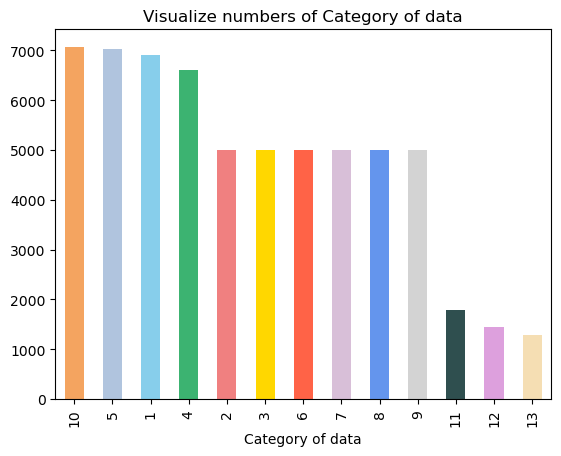

In [27]:
category_colors = {
    1: "skyblue",
    2: "lightcoral",
    3: "gold",
    4: "mediumseagreen",
    5: "lightsteelblue",
    6: "tomato",
    7: "thistle",
    8: "cornflowerblue",
    9: "lightgray",
    10: "sandybrown",
    11: "darkslategray",
    12: "plum",
    13: "wheat"

}

# final_df.groupby('category').category_id.value_counts().plot(kind = "bar", color=[category_colors[cat_id] for cat_id in category_counts['category_id']])
# plt.xlabel("Category of data")
# plt.title("Visulaize numbers of Category of data")
# plt.show()

# Assuming 'category_id' is the column you want to group by
category_counts = final_df['category_id'].value_counts()

category_counts.plot(kind="bar", color=[category_colors[cat_id] for cat_id in category_counts.index])
plt.xlabel("Category of data")
plt.title("Visualize numbers of Category of data")
plt.show()

In [28]:
category_list

category  category_id
62119          SPORTS            1
56752        BUSINESS            2
15354        WELLNESS            3
21352        POLITICS            4
26387   ENTERTAINMENT            5
31592          TRAVEL            6
36594  STYLE & BEAUTY            7
41594       PARENTING            8
46528    FOOD & DRINK            9
47176           WORLD           10
570        TECHNOLOGY           11
9833          SCIENCE           12
142        AUTOMOBILE           13

In [29]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

sports = final_df[final_df['category_id'] == 1]

sports = sports['description']

business = final_df[final_df['category_id'] == 2]

business = business['description']

wellness = final_df[final_df['category_id'] == 3]

wellness = wellness['description']

politics = final_df[final_df['category_id'] == 4]

politics = politics['description']

entertainment = final_df[final_df['category_id'] == 5]

entertainment = entertainment['description']

travel = final_df[final_df['category_id'] == 6]

travel = travel['description']

styleandbeauty = final_df[final_df['category_id'] == 7]

styleandbeauty = styleandbeauty['description']

parenting = final_df[final_df['category_id'] == 8]

parenting = parenting['description']

foodanddrink = final_df[final_df['category_id'] == 9]

foodanddrink = foodanddrink['description']

world = final_df[final_df['category_id'] == 10]

world = world['description']

technology = final_df[final_df['category_id'] == 11]

technology = technology['description']

science = final_df[final_df['category_id'] == 12]

science = science['description']

automobile = final_df[final_df['category_id'] == 13]

automobile = automobile['description']

In [30]:
def wordcloud_draw(dataset, color = 'white'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()

    if (word != 'news' and word != 'short_description')])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 2500, height = 2500).generate(cleaned_word)
        

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    plt.show()

sport related words:


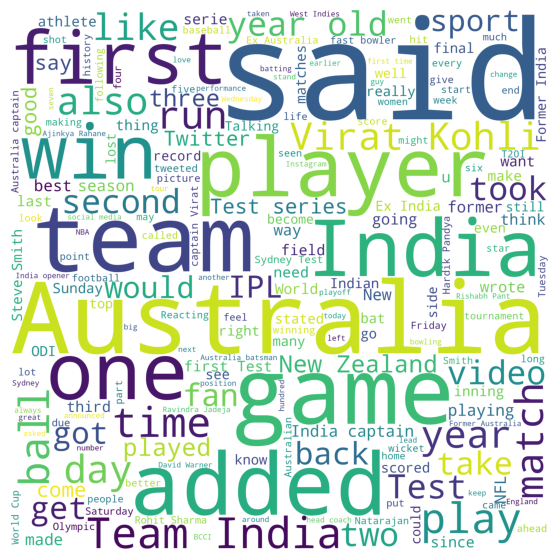

business related words:


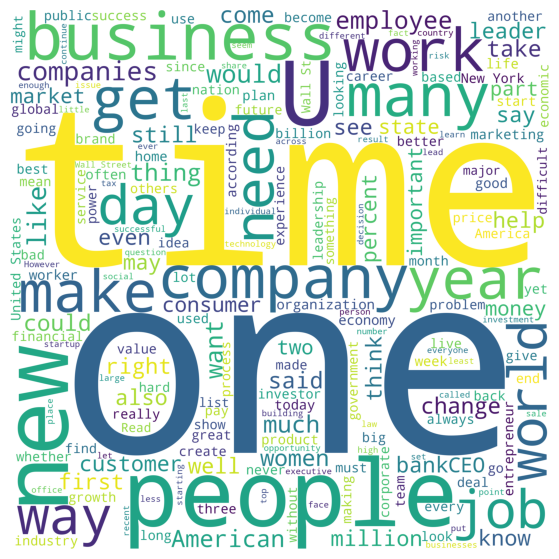

wellness related words:


entertainment related words:


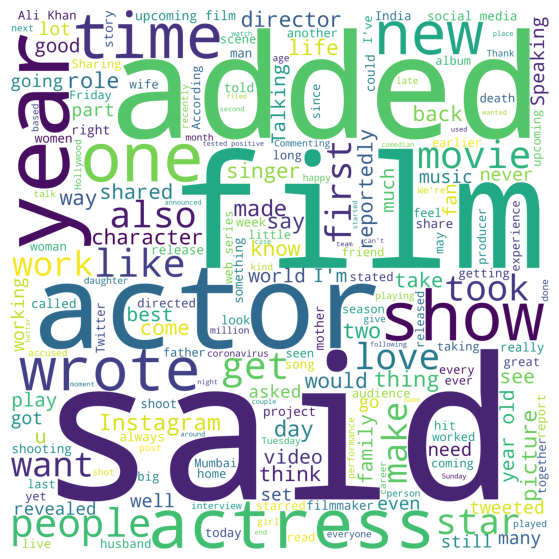

travel related words:


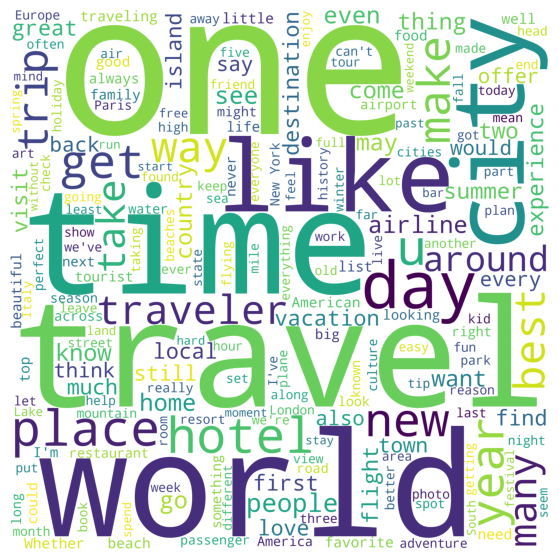

style and beauty related words:


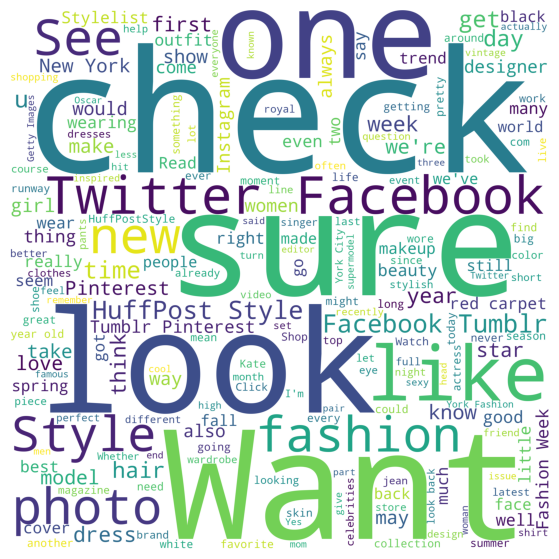

parenting related words:


food and drink related words:


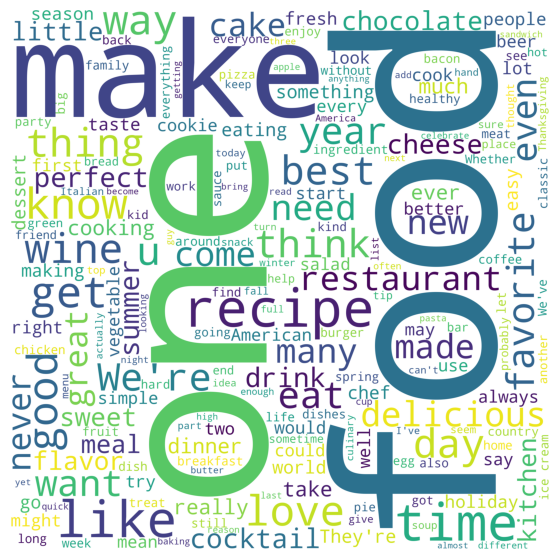

world related words:


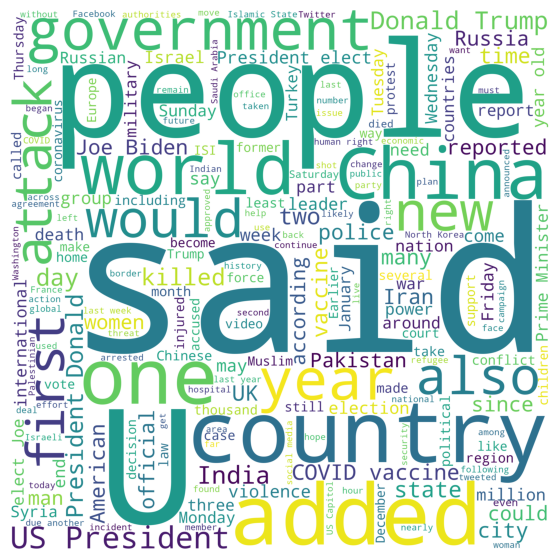

technology related words:


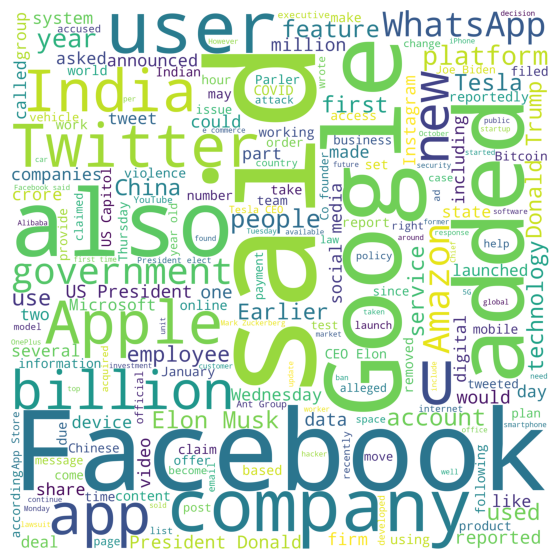

science related words:


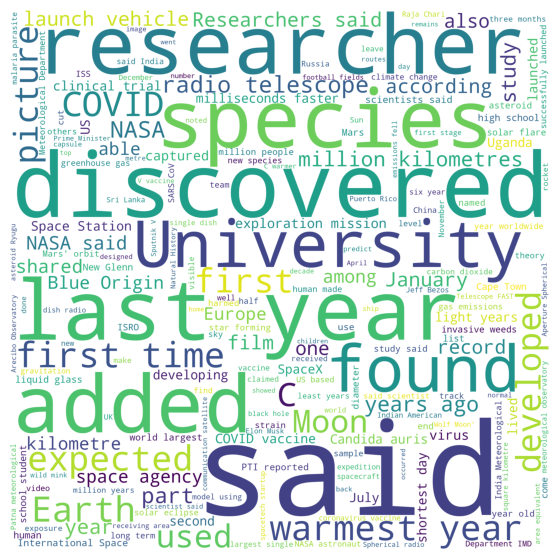

automobile related words:


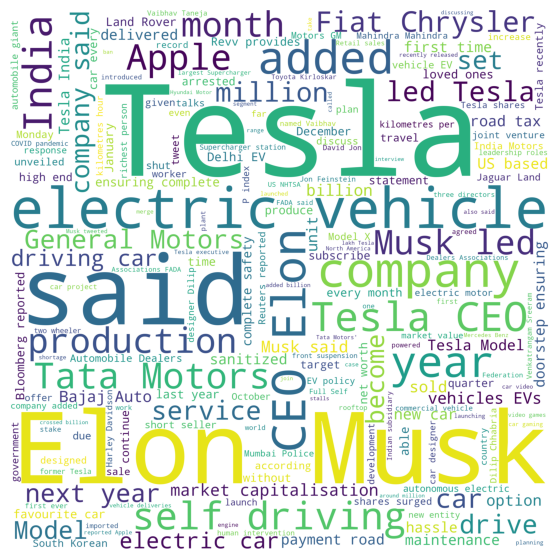

In [31]:
print("sport related words:")

wordcloud_draw(sports, 'white')

print("business related words:")

wordcloud_draw(business, 'white')

print("wellness related words:")

wordcloud_draw(wellness, 'white')

print("entertainment related words:")

wordcloud_draw(entertainment, 'white')

print("travel related words:")

wordcloud_draw(travel, 'white')

print("style and beauty related words:")

wordcloud_draw(styleandbeauty, 'white')

print("parenting related words:")

wordcloud_draw(parenting, 'white')

print("food and drink related words:")

wordcloud_draw(foodanddrink, 'white')

print("world related words:")

wordcloud_draw(world, 'white')

print("technology related words:")

wordcloud_draw(technology, 'white')

print("science related words:")

wordcloud_draw(science, 'white')

print("automobile related words:")

wordcloud_draw(automobile, 'white')

In [32]:
#Remove Tags

def remove_tags(text):
  remove = re.compile(r'<.*?>')
  return re.sub(remove, '', text)
final_df['description'] = final_df['description'].apply(remove_tags)

In [33]:
#Special Character removal

def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
final_df['description'] = final_df['description'].apply(special_char)

In [34]:
#Lowercasing

def convert_lower(text):
   return text.lower()
final_df['description'] = final_df['description'].apply(convert_lower)


print(final_df['description'][1])

microsoft teams will stop working on internet explorer 11 from today  november 30  users will now need to download the teams app or browse it on microsoft edge  besides this  microsoft 365 apps and services will stop supporting internet explorer 11 by august 2021  microsoft will also pull support for microsoft edge legacy desktop app on march 9 


In [35]:
#Stopwords removal

def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
final_df['description'] = final_df['description'].apply(remove_stopwords)


print(final_df['description'][1])

['microsoft', 'teams', 'stop', 'working', 'internet', 'explorer', '11', 'today', 'november', '30', 'users', 'need', 'download', 'teams', 'app', 'browse', 'microsoft', 'edge', 'besides', 'microsoft', '365', 'apps', 'services', 'stop', 'supporting', 'internet', 'explorer', '11', 'august', '2021', 'microsoft', 'also', 'pull', 'support', 'microsoft', 'edge', 'legacy', 'desktop', 'app', 'march', '9']


In [36]:
#Lemmatization

def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
final_df['description'] = final_df['description'].apply(lemmatize_word)
# Access and print the lemmatized 'short_description' of the first row
print(final_df['description'][1])

microsoft team stop working internet explorer 11 today november 30 user need download team app browse microsoft edge besides microsoft 365 apps service stop supporting internet explorer 11 august 2021 microsoft also pull support microsoft edge legacy desktop app march 9


In [37]:
selected_data['description'] = selected_data['description'].apply(remove_tags)
selected_data['description'] = selected_data['description'].apply(special_char)
selected_data['description'] = selected_data['description'].apply(convert_lower)
selected_data['description'] = selected_data['description'].apply(remove_stopwords)
selected_data['description'] = selected_data['description'].apply(lemmatize_word)

print(selected_data['description'])

2998     ex australia captain allan border belief pacer...
2339     csk rounder ravindra jadeja smashed two six la...
2338     csk ravindra jadeja thursday became fifth indi...
2337     rajasthan royal chased 186 run target king xi ...
2336     kxip batsman chris gayle threw away bat frustr...
                               ...                        
12338    baidu become first receive permit beijing tran...
12339    road transport highway minister nitin gadkari ...
12340    tesla ceo elon musk sent email worker encourag...
12327    volkswagen ceo herbert dy blog post revealed o...
12999    tesla marked entry india registered company be...
Name: description, Length: 13000, dtype: object


# Using final_df dataset with TF-IDF Vectorizer

In [38]:
#Set the Input features and target

# x = final_df['description']
# y = final_df['category_id']

x = final_df['description']
y = final_df['category_id']

In [39]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Assuming 'final_df' contains your dataset

x = np.array(final_df.iloc[:,0].values)
y = np.array(final_df.category_id.values)

# Create a TF-IDF vectorizer with a maximum of 6000 features
tfidf = TfidfVectorizer(max_features=7000)

# Transform the text data using TF-IDF vectorization
x = tfidf.fit_transform(final_df.description).toarray()

print("x.shape =", x.shape)
print("y.shape =", y.shape)


x.shape = (62120, 7000)
y.shape = (62120,)


In [40]:
#Split the data into train and test

#TF-IDF
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

# #Count Vectorizer
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle = True)
# print(len(x_train))
# print(len(x_test))

49696
12424


In [41]:
### REMEMBER NEED TO DO HYPERPARAMETER TUNING AND TRY TO BALANCE OUT THE DATASET

# Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and fit the Decision Tree classifier
mdl1 = DecisionTreeClassifier(random_state=42)
mdl1.fit(x_train, y_train)

# Make predictions
y_pred = mdl1.predict(x_test)

# Calculate performance metrics
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1score = f1_score(y_test, y_pred, average='micro')

print(f'Test Accuracy Score of Decision Tree Classifier: % {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1score}')


Test Accuracy Score of Decision Tree Classifier: % 60.92
Precision: 0.6092240824211204
Recall: 0.6092240824211204
F1-score: 0.6092240824211204


# Multinomial Naive Bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB

# Create and fit the Multinomial Naive Bayes classifier
mdl2 = MultinomialNB()
mdl2.fit(x_train, y_train)

# Make predictions
y_pred = mdl2.predict(x_test)

# Performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1score = f1_score(y_test, y_pred, average='micro')

print(f'Test Accuracy Score of Multinomial Naive Bayes: % {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1score}')


Test Accuracy Score of Multinomial Naive Bayes: % 69.16
Precision: 0.6916452028332261
Recall: 0.6916452028332261
F1-score: 0.6916452028332261


# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

# Create and fit the Logistic Regression classifier
mdl3 = LogisticRegression(random_state=42)
mdl3.fit(x_train, y_train)

# Make predictions
y_pred = mdl3.predict(x_test)

# Performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1score = f1_score(y_test, y_pred, average='micro')

print(f'Test Accuracy Score of Logistic Regression: % {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1score}')


Test Accuracy Score of Logistic Regression: % 71.4
Precision: 0.7140212491951062
Recall: 0.7140212491951062
F1-score: 0.7140212491951062


/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Classifier

In [45]:
# Create and fit the Random Forest classifier

mdl = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
mdl.fit(x_train, y_train)

# Make predictions
y_pred = mdl.predict(x_test)

# Performance metrics
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

# Get precision, recall, and F1-score
precision, recall, f1score, support = score(y_test, y_pred, average='micro')

print(f'Test Accuracy Score of Random Forest: % {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1score}')

Test Accuracy Score of Random Forest: % 67.31
Precision: 0.6731326464906632
Recall: 0.6731326464906632
F1-score: 0.6731326464906632


# Hyperparameter Tuning for Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(mdl3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_estimator.predict(x_test)

# Calculate performance metrics
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1score = f1_score(y_test, y_pred, average='micro')

# Print the results
print(f'Best Parameters: {best_params}')
print(f'Test Accuracy Score of Logistic Regression after Hyperparameter Tuning: % {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1score}')


/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy Score of Logistic Regression after Hyperparameter Tuning: % 71.4
Precision: 0.7140212491951062
Recall: 0.7140212491951062
F1-score: 0.7140212491951062


# Predictions - final_df

In [73]:
prediction_texts = """PETALING JAYA: Professional men's singles shuttler Lee Zii Jia defeated fellow Malaysian Ng Tze Yong to make it into the second round of the China Masters.

World No. 11 Zii Jia had to dig deep before overcoming world No. 15 Tze Yong 21-15, 20-22, 21-17 in a thrilling opening round match at the Shenzhen Bay Gymnasium on Wednesday (Nov 22).

Zii Jia will next face world No. 16 homester Lu Guangzu in the second round on Thursday (Nov 23).

Meanwhile, women's doubles pair Pearly Tan-M. Thinaah and mixed doubles combinations Goh Soon Huat-Shevon Lai Jemie and Tan Kian Mei-Lai Pei Jing all crashed out of the competition.

World No. 12 Pearly-Thinaah fought hard but agonisingly lost 11-21, 21-15, 20-22 to South Korea's world No. 11 Jeong Na-eun-Kim Hye-jeong.

Soon Huat-Shevon went down 17-21, 20-22 to Hong Kong's Tang Chun Man-Tse Ying Suet, while Kian Meng-Pei Jing fell 16-21, 21-23 to Singapore's Terry Hee-Jessica Tan.””"""

prediction_texts = remove_tags(prediction_texts)
prediction_texts = special_char(prediction_texts)
prediction_texts = convert_lower(prediction_texts)
prediction_texts = remove_stopwords(prediction_texts)
prediction_texts = lemmatize_word(prediction_texts)

print(prediction_texts)

petaling jaya professional men single shuttler lee zii jia defeated fellow malaysian ng tze yong make second round china master world 11 zii jia dig deep overcoming world 15 tze yong 21 15 20 22 21 17 thrilling opening round match shenzhen bay gymnasium wednesday nov 22 zii jia next face world 16 homester lu guangzu second round thursday nov 23 meanwhile woman double pair pearly tan thinaah mixed double combination goh soon huat shevon lai jemie tan kian mei lai pei jing crashed competition world 12 pearly thinaah fought hard agonisingly lost 11 21 21 15 20 22 south korea world 11 jeong na eun kim hye jeong soon huat shevon went 17 21 20 22 hong kong tang chun man tse ying suet kian meng pei jing fell 16 21 21 23 singapore terry hee jessica tan


In [74]:
#Predict the input text

y_pred1 = tfidf.transform([prediction_texts])


yy = best_estimator.predict(y_pred1)
result = ""
if yy == [1]:
  result = "Sports News"
elif yy == [2]:
  result = "Business News"
elif yy == [3]:
  result = "Wellness News"
elif yy == [4]:
  result = "Politics News"
elif yy == [5]:
  result = "Entertainment News"
elif yy == [6]:
  result = "Travel News"
elif yy == [7]:
  result = "Style and Beauty News"
elif yy == [8]:
  result = "Parenting News"
elif yy == [9]:
  result = "Food and Drink News"
elif yy == [10]:
  result = "World News"
elif yy == [11]:
  result = "Technology News"
elif yy == [12]:
  result = "Science News"
elif yy == [13]:
  result = "Automobile News"
print(result)


Sports News


# Using selected_data as the Dataset with CountVectorizer

In [49]:
#Set the Input features and target

X = selected_data['description']
Y = selected_data['category_id']

In [50]:
#Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

x = np.array(selected_data.iloc[:,0].values)
y = np.array(selected_data.category_id.values)

cv = CountVectorizer(max_features = 7000)
x = cv.fit_transform(selected_data.description).toarray()

print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (13000, 7000)
y.shape =  (13000,)


In [68]:
dump(cv, 'count_vectorizer.joblib')

['count_vectorizer.joblib']

In [51]:
#Split the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True)
print(len(x_train))
print(len(x_test))

10400
2600


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and fit the Decision Tree classifier
mdl1 = DecisionTreeClassifier(random_state=42)
mdl1.fit(x_train, y_train)

# Make predictions
y_pred = mdl1.predict(x_test)

# Calculate performance metrics
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1score = f1_score(y_test, y_pred, average='micro')

print(f'Test Accuracy Score of Decision Tree Classifier: % {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1score}')


Test Accuracy Score of Decision Tree Classifier: % 73.23
Precision: 0.7323076923076923
Recall: 0.7323076923076923
F1-score: 0.7323076923076923


In [53]:
from sklearn.naive_bayes import MultinomialNB

# Create and fit the Multinomial Naive Bayes classifier
mdl2 = MultinomialNB()
mdl2.fit(x_train, y_train)

# Make predictions
y_pred = mdl2.predict(x_test)

# Performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1score = f1_score(y_test, y_pred, average='micro')

print(f'Test Accuracy Score of Multinomial Naive Bayes: % {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1score}')


Test Accuracy Score of Multinomial Naive Bayes: % 79.54
Precision: 0.7953846153846154
Recall: 0.7953846153846154
F1-score: 0.7953846153846154


In [54]:
from sklearn.linear_model import LogisticRegression

# Create and fit the Logistic Regression classifier
mdl5 = LogisticRegression(random_state=42)
mdl5.fit(x_train, y_train)

# Make predictions
y_pred = mdl5.predict(x_test)

# Performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1score = f1_score(y_test, y_pred, average='micro')

print(f'Test Accuracy Score of Logistic Regression: % {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1score}')


Test Accuracy Score of Logistic Regression: % 81.31
Precision: 0.813076923076923
Recall: 0.813076923076923
F1-score: 0.813076923076923


/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# Create and fit the Random Forest classifier

mdl = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
mdl.fit(x_train, y_train)

# Make predictions
y_pred = mdl.predict(x_test)

# Performance metrics
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

# Get precision, recall, and F1-score
precision, recall, f1score, support = score(y_test, y_pred, average='micro')

print(f'Test Accuracy Score of Random Forest: % {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1score}')

Test Accuracy Score of Random Forest: % 78.08
Precision: 0.7807692307692308
Recall: 0.7807692307692308
F1-score: 0.7807692307692308


# Hyperparameter Tuning for Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(mdl5, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimatorss = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_estimatorss.predict(x_test)

# Calculate performance metrics
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1score = f1_score(y_test, y_pred, average='micro')

# Print the results
print(f'Best Parameters: {best_params}')
print(f'Test Accuracy Score of Logistic Regression after Hyperparameter Tuning: % {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1score}')


/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy Score of Logistic Regression after Hyperparameter Tuning: % 81.58
Precision: 0.8157692307692308
Recall: 0.8157692307692308
F1-score: 0.8157692307692308


In [64]:
from joblib import dump

# Assuming 'mdl5' is your logistic regression model
dump(best_estimatorss, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

# Predictions - selected_data

In [75]:
prediction_texts = """“MANCHESTER, England (Reuters) - Manchester United defender Luke Shaw has returned to training after being sidelined for three months with a muscle injury, the club said on Wednesday.

The England left back suffered the injury in August after appearing in United's first two Premier League games of the season.

Erik ten Hag's team have several injury concerns ahead of Sunday's league game at Everton. Christian Eriksen (knee) and Rasmus Hojlund (thigh) withdrew from the Denmark squad last week and goalkeeper Andre Onana was hurt playing for Cameroon.

”"""

prediction_texts = remove_tags(prediction_texts)
prediction_texts = special_char(prediction_texts)
prediction_texts = convert_lower(prediction_texts)
prediction_texts = remove_stopwords(prediction_texts)
prediction_texts = lemmatize_word(prediction_texts)

print(prediction_texts)

manchester england reuters manchester united defender luke shaw returned training sidelined three month muscle injury club said wednesday england left back suffered injury august appearing united first two premier league game season erik ten hag team several injury concern ahead sunday league game everton christian eriksen knee rasmus hojlund thigh withdrew denmark squad last week goalkeeper andre onana hurt playing cameroon


In [76]:
#Predict the input text

y_pred1 = cv.transform([prediction_texts])


yy = best_estimatorss.predict(y_pred1)
result = ""
if yy == [1]:
  result = "Sports News"
elif yy == [2]:
  result = "Business News"
elif yy == [3]:
  result = "Wellness News"
elif yy == [4]:
  result = "Politics News"
elif yy == [5]:
  result = "Entertainment News"
elif yy == [6]:
  result = "Travel News"
elif yy == [7]:
  result = "Style and Beauty News"
elif yy == [8]:
  result = "Parenting News"
elif yy == [9]:
  result = "Food and Drink News"
elif yy == [10]:
  result = "World News"
elif yy == [11]:
  result = "Technology News"
elif yy == [12]:
  result = "Science News"
elif yy == [13]:
  result = "Automobile News"
print(result)


Sports News
